In [ ]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

In [15]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Loading pipeline components...: 100%|█████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.71it/s]


In [5]:
original_image = load_image(
    "https://www.qut.edu.au/__data/assets/image/0007/909781/qut-logo-og-1200.jpg"
)

image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.18s/it]


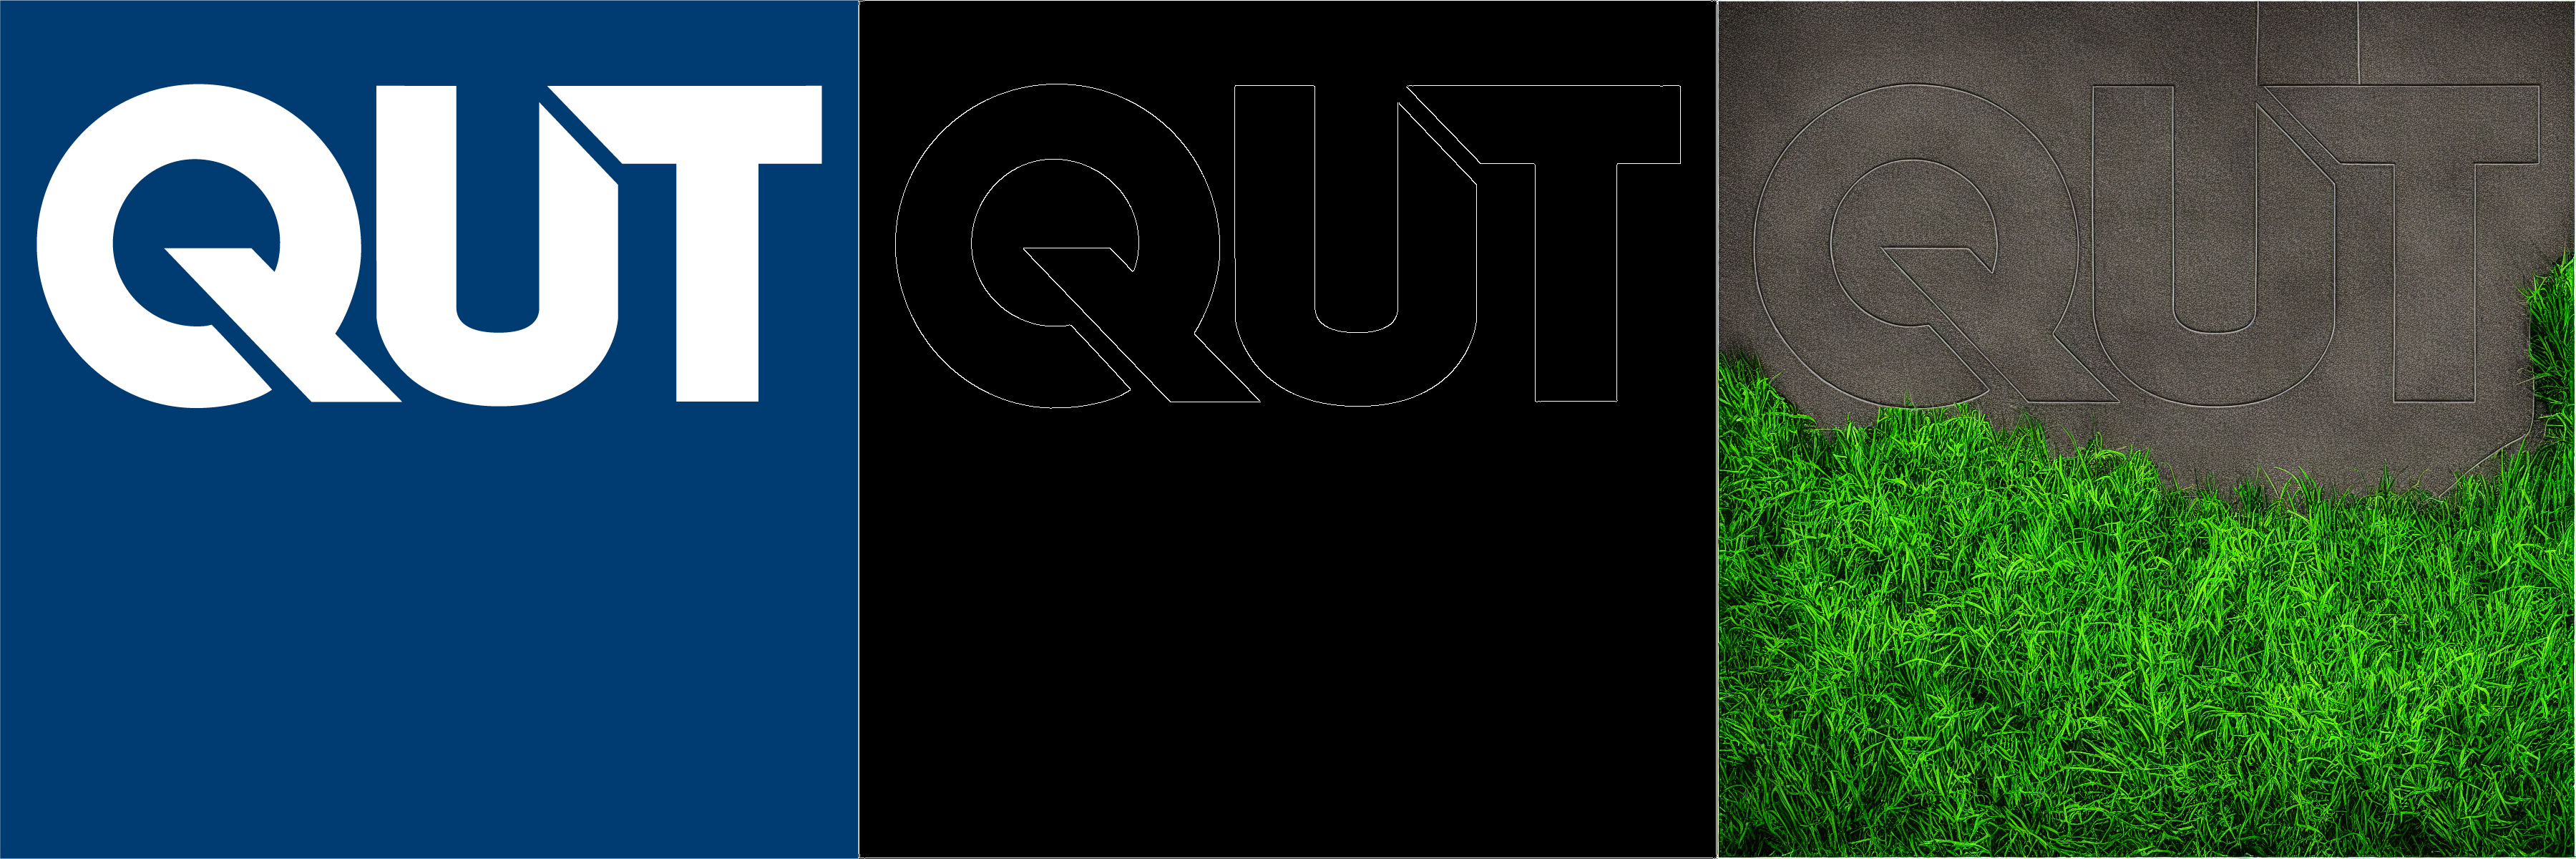

In [9]:
output = pipe(
    "cinematic photo of a flowerbed surrounded by grass, 35mm photograph, film, professional, 4k, highly detailed", image=canny_image, num_inference_steps = 20, guidance_scale = 9
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)